# Assignment 3
## Math 2565
### University of Lethbridge
### March 28, 2021. (Due April 4th at 11:59 pm)

In this assignment we explore differential equations. You will want to revisit the Jupyter notebook used for the classes prior to the strike, where you will find examples with Python code for solving some of the problems below.

You are welcome to be creative and come up with your own code for solving these problems. In particular, the SciPy (Scientific Python) library has a number of useful functions for handling differential equations. But make sure that you are using the correct algorithm. (In particular, if the question says to use Euler's method, make sure that's what you're using. Most numerical algorithms that are used in practice are more sophisticated.

### Problem 1: Slope fields.

Plot the slope fields (a.k.a. direction fields) for each differential equation below. In the same plot, include solution curves for at least two choices of initial condition.

Comment on your results. (Be sure to indicate what the initial conditions are in each case.)

a) $y'=x\sin(y)$

b) $y'+\dfrac{xy}{1+x^2}=0$

#### Solution:

From the lecture slides used in class, we'll take the code that was used to simultaneously plot a direction field and a solution curve. But we will have to modify the code slightly to include a second initial condition.

The lines referencing `ysolve` have been duplicated, so that there is now a `ysolve0` and a `ysolve1`. This lets us include two plots, one for each initial condition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
a = 0.0
b = 5.0
c = 0.0
d = 5.0
slopesamples = 20
solvesamples = 100
xvals = np.linspace(a,b,slopesamples)
yvals = np.linspace(c,d,slopesamples)
xsolve = np.linspace(a,b,solvesamples)
#y0 = -1.0

def dfplot(func,y0,y1):
        for j in xvals:
            for k in yvals:
                slope = func(k,j)
                domain = np.linspace(j-0.05,j+0.05,2)
                def fun(x1,y1):
                    z = slope*(domain-x1)+y1
                    return z
                ysolve0 = odeint(func, y0, xsolve) # first value for y(0)
                ysolve0 = np.array(ysolve0).flatten()
                ysolve1 = odeint(func, y1, xsolve) # second value for y(0)
                ysolve1 = np.array(ysolve1).flatten()
                plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')
                plt.plot(xsolve,ysolve0) # plot first solution curve
                plt.plot(xsolve,ysolve1) # plot second solution curve

        plt.title("Slope field for y'=f(x,y)")
        plt.grid(True)
        plt.ylim(c,d)
        plt.xlim(a,b)

#### Solution for part (a):

I've used initial conditions $y(0)=\pi/2$, and $y(0)=3\pi/2$. (Reasons for these choices will be more clear in Question 2.) Note that there is also a boring constant solution: $y(0)=\pi$ gives $y(t)=\pi$ for all $t$.

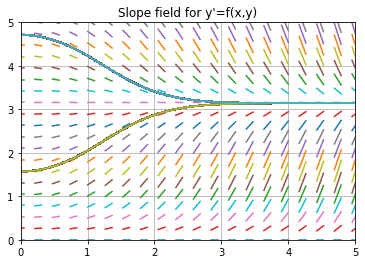

In [3]:
def func(y,x):
    return x*np.sin(y)

dfplot(func,np.pi/2,3*np.pi/2)

Looking at the solution curves above, we see that they both lie tangent to the slope field, and both approach the constant solution $y=\pi$ as $t$ increases.

#### Solution for part (b):

This time we should be able to just redefine `func(y,x)` and enter new initial conditions.

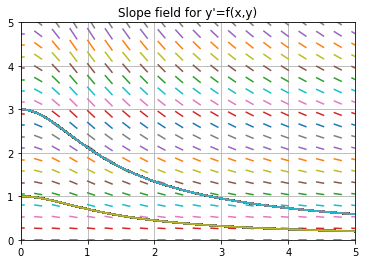

In [4]:
def func(y,x):
    return -x*y/(1+x**2)

dfplot(func,1.0,3.0)

Again, we see that the curves do appear to lie tangent to the slope field. If we go back to the large code cell above, it is also instructive to change the y range to something that includes negative y values. In that case, we see that all solutions aproach $y=0$ as $t$ increases.

### Problem 2: Solution methods

For each differential equation in Problem 1, indicate whether the equation is separable, linear, neither, or both.

Then, solve the differential equation using the methods from Chapter 8.

You may wish to do this problem on paper rather than in the notebook.

#### Solution

Part (a): the equation is separable. We can rearrange as
$$\csc(y)\,dy = x\,dx$$

Integrating gives

$$-\ln|\csc(y)+\cot(y)| = \frac12 x^2+C$$

We can rewrite this as

$$\csc(y)+\cot(y) = ke^{-x^2/2},$$

but we can't easily solve explicitly for $y$. The initial condition $y(0)=\pi/2$ gives 
$$\csc(\pi/2)+\cot(\pi/2) = 1+0 = k,$$
so $\csc(y)+\cot(y)=e^{-x^2/2}$.

The initial condition $y(0)=3\pi/2$ similarly gives $\csc(y)+\cot(y)=-e^{-x^2/2}$.

In case you are wondering if these solutions correspond to what we found in question 1:

Matplotlib doesn't easily handle implicit plots, but [SymPy does](https://docs.sympy.org/latest/modules/plotting.html)!

Let's rewrite our equation. For $y(0)=\pi/2$:

$$\frac{1+\cos(y)}{\sin(y)}=e^{-x^2/2} \Rightarrow e^{-x^2/2}\sin(y)-\cos(y)=1$$

SymPy takes the following syntax: `Eq(expr,c)` will plot an equation of the form $\text{expr}=c$, where 'expr' is some expression involving $x$ and $y$. We can also give optional $x$ and $y$ ranges. We'll choose 0 to 5 for both, as we did above.

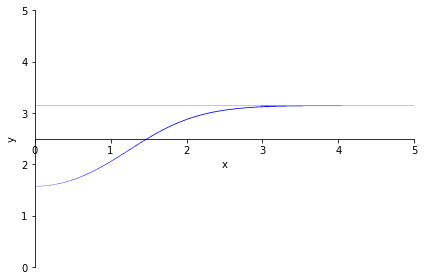

In [5]:
import sympy as sy
sy.var('x y')
sy.plot_implicit(sy.Eq(sy.exp(-x**2/2)*sy.sin(y)-sy.cos(y),1),(x,0,5),(y,0,5))

Looks about right! For our other initial value, we have $e^{-x^2}\sin(y)+\cos(y)=-1$:

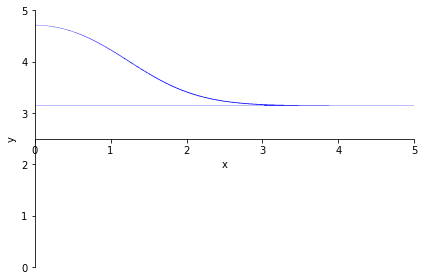

In [6]:
sy.plot_implicit(sy.Eq(sy.exp(-x**2/2)*sy.sin(y)+sy.cos(y),-1),(x,0,5),(y,0,5))

I'm now feeling pretty good about these solutions. **On to part (b)**.

We have the linear differential equation $y'+\dfrac{x}{1+x^2}y=0$, with integrating factor

$$\mu = e^{\int \frac{x}{1+x^2}\,dx} = e^{\frac12\ln(1+x^2)} = \sqrt{1+x^2}$$

so our equation becomes

$$\frac{d}{dx}(\sqrt{1+x^2}y)=0.$$

Our solution is simply $y = C(1+x^2)^{-1/2}$.

Note that this equation is also separable: $\frac{1}{y}dy = -\frac{x}{1+x^2}\,dx$, and integrating both sides will produce the same solution as above.

For the initial condition $y(0)=1$, we have $y=\frac{1}{\sqrt{1+x^2}}$, and for $y(0)=3$, it's $y=\frac{3}{\sqrt{1+x^2}}$.

### Problem 3: Euler's method

For each differential equation in Problem 1:

a) Using the initial condition $y(0)=1$, solve the corresponding initial value problem, using your results from Problem 2.

b) For the same initial condition, use Euler's method to compute an approximate solution on the interval $[0,1]$, with 20 steps.

c) Create a plot that compares the exact solution from part (a) with the approximate solution from part (b). Comment on the results.

#### Solution

We'll start with the second differential equation, where we were actually have an exact solution. Plotting the implicit solution for the first equation will be a bit trickier.

In [7]:
def odeEuler(f,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [8]:
def f(y,t):
    return -t*y/(1+t**2)
t = np.linspace(0,1,21)
y0 = 1

t,odeEuler(f,y0,t)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([1.        , 1.        , 0.99750623, 0.99256808, 0.98528763,
        0.97581371, 0.96433355, 0.95106291, 0.93623565, 0.92009365,
        0.90287776, 0.88482021, 0.86613878, 0.84703278, 0.82768054,
        0.80823838, 0.78884066, 0.76960064, 0.75061195, 0.73195032,
        0.71367561]))

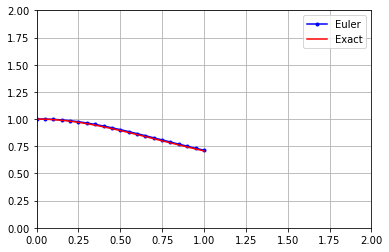

In [9]:
y_exact = (1+t**2)**(-0.5)
y_euler = odeEuler(f,y0,t)
plt.plot(t,y_euler,'b.-',t,y_exact,'r-')
plt.legend(['Euler','Exact'])
plt.axis([0,2,0,2])
plt.grid(True)
plt.show()

Hey, that's pretty darn good! Now, can we deal with the first one? It turns out we **can** solve for $y$, with a bit of trigonometric trickery, using double-angle identities, where we replace $y$ by $y/2$: $1+\cos(y) = 2\cos^2(y/2)$, and $\sin(y) = 2\sin(y/2)\cos(y/2)$

$$\csc(y)+\cot(y) = \dfrac{1+\cos(y)}{\sin(y)} = \dfrac{2\cos^2(y/2)}{2\sin(y/2)\cos(y/2)} = \cot(y/2).$$

Therefore, our equation becomes $\cot(y/2) = ke^{-x^2/2}$, or $\tan(y/2)=Ce^{x^2/2}$, with $C=1/k$. Therefore, $y=2\arctan(Ce^{x^2/2})$. For $y(0)=1$, we have $1 = 2\arctan(C)$, so $C=\tan(0.5)$.

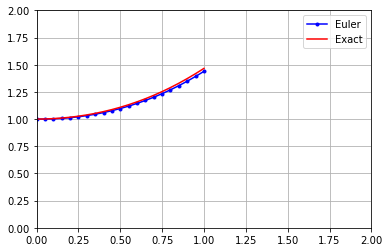

In [10]:
def f(y,t):
    return t*np.sin(y)
t = np.linspace(0,1,21)
y0 = 1
y_exact = 2*np.arctan(np.tan(0.5)*np.exp(t**2/2))
y_euler = odeEuler(f,y0,t)
plt.plot(t,y_euler,'b.-',t,y_exact,'r-')
plt.legend(['Euler','Exact'])
plt.axis([0,2,0,2])
plt.grid(True)
plt.show()

Also pretty good!